# TP1: Lois discrètes 3M246 JAFUNO Douba

In [1]:
from random import random
import matplotlib.pyplot as plt 

# 1 Loi uniforme

In [2]:
#Question 1

print("Simulation d'une variable aleatoire uniforme sur [0,1] :", random())
#random loi uniform sur [0,1]


### Fonction qui Simule une variable aleatoire uniforme sur [a,b]
def unif1(a,b):
    return a+(b-a)*random()

#Test 
print("Une variable uniforme sur [2,3]: ", unif1(4,5) )
print("Une variable uniforme sur [12,55]: ",unif1(25,28))
print("Une variable uniforme sur [102,130]: ",unif1(102,130))

Simulation d'une variable aleatoire uniforme sur [0,1] : 0.16366375855968907
Une variable uniforme sur [2,3]:  4.870098197303742
Une variable uniforme sur [12,55]:  27.692722465211276
Une variable uniforme sur [102,130]:  107.18322100256479


In [3]:
#Question 2 

#Fonction qui renvoie une variable uniforme sur l'ensemble {0,1,...,N-1}
def unif2(N):
    return int(N*random())

#Test 
print("Une variable uniforme sur [0,5]: ", unif2(6))
print("Une variable uniforme sur [0,3]: ", unif2(2))


Une variable uniforme sur [0,5]:  4
Une variable uniforme sur [0,3]:  0


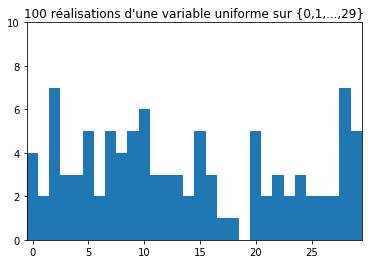

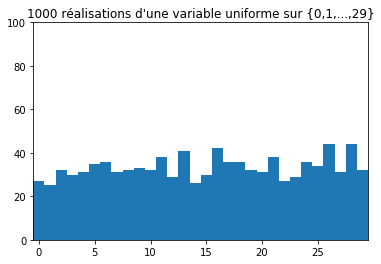

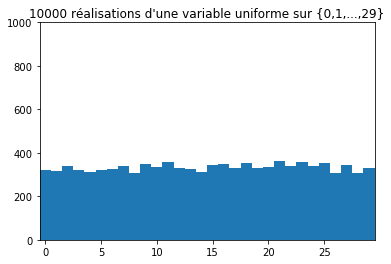

In [4]:
#Question 3

#Fonction qui renvoie l'histogramme de k réalisations 
# d’une variable aléatoire uniforme sur {0, . . . , N − 1}  aveec N= 30 et k= 100,1000 et 10000
def hist_unif(N,k):
    plt.hist([unif2(N) for j in range(k)], bins=30, range=(-0.5,29.5))
    plt.title(str(k)+" réalisations d'une variable uniforme sur {0,1,...,29}")
    plt.axis([-0.5,29.5,0,k*0.1])
    plt.show()

#Test 
N = 30    
hist_unif(N,100)
hist_unif(N,1000)
hist_unif(N,10000)

# 2 Loi de Bernoulli, loi binomiale


In [5]:

#Question 4 
# Fonction qui simule une variable aléatoire de loi de Bernoulli de paramètre p
def bernoulli(p):
    if unif1(0,1)<p:  #random() loi uniforme U[0,1]
        return 1
    else:
        return 0
    
#Test
print("1 variable de Bernoulli de parametre 0.5: ", bernoulli(0.5))
print("1 variable de Bernoulli de parametre 0.7: ", bernoulli(0.7))
print("1 variable de Bernoulli de parametre 0.4: ", bernoulli(0.4))


1 variable de Bernoulli de parametre 0.5:  0
1 variable de Bernoulli de parametre 0.7:  1
1 variable de Bernoulli de parametre 0.4:  1


In [6]:
#Question 5 
# Fonction qui eenvoie une realisation d'une variable aleatoire de loi binomiale de parametres n et p
# c'est la somme de n variables (independantes) de loi de Bernoulli de parametre p
def binomiale(n,p):
    return sum([bernoulli(p) for i in range(n)] )

#Test
print("1 variable binomiale de parametre (10,0.5): ", binomiale(10,0.5))
print("1 variable binomiale de parametre (5,0.7): ", binomiale(5,0.7))


1 variable binomiale de parametre (10,0.5):  4
1 variable binomiale de parametre (5,0.7):  3


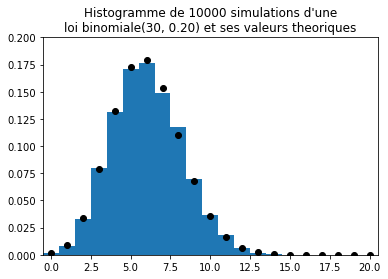

In [7]:
#Question 6 
# fct qui affiche l'histogramme de N simulations de variables aléatoires de loi binomiale de paramètres n et p
# et superposition avec le graphe des valeurs théoriques

def hist_bin(n,p,N):
    proba_theorique = [1] * (n+1)
    for k in range(n+1):
        proba_theorique[k] *= (p ** k) * ((1-p)**(n-k))
        prod = 1
        for q in range(k):
            prod *=  (n-q) / (q+1.)
        proba_theorique[k] *= prod
    plt.hist([binomiale(n,p) for i in range(N)], density=True, bins=31, range=(-0.5,30.5))
    plt.plot(proba_theorique, 'ko') 
    plt.axis([-0.5,20.5,0,0.2])
    plt.title("Histogramme de %d simulations d'une\nloi binomiale(%d, %.2f) et ses valeurs theoriques" % (N,n,p))
    plt.show()
    
#Test
hist_bin(30,0.2,10000)

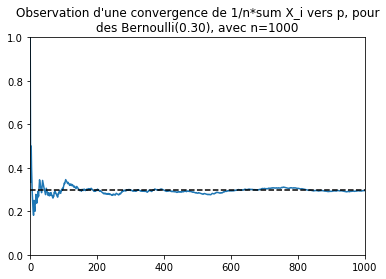

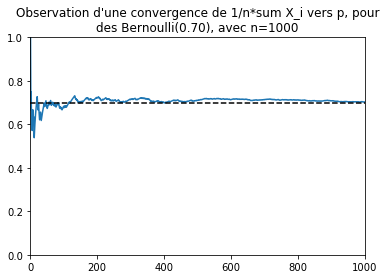

In [8]:
#Question 7
#7. Pour une valeur de p fixée, simuler la suite de variables aléatoires (Yn/n)n∈N, où Yn  suit une loi binomiale n et p
# c'est la (loi des Grand nombres tp suivants)

def lgn_pern(n,p):
    X_n = [bernoulli(p) for i in range(n)]
    Y_n_n = [sum(X_n[:i])/float(i) for i in range(1,n+1)] 
    plt.plot(Y_n_n)
    plt.plot([0,n],[p, p], '--k')
    plt.axis([0,n,0,1])
    plt.title("Observation d'une convergence de 1/n*sum X_i vers p, pour\ndes Bernoulli(%.2f), avec n=%d" % (p,n))
    plt.show()

#test 
lgn_pern(1000,0.3)
lgn_pern(1000,0.7)

# 3 Loi arbitraire

In [9]:
#Question 9
#Fonction qui Simule une variable aleatoire X a valeurs dans {0,1,2,3}, avec le probabilites suivantes :
#p(x=0) = 1/2 =p_0;   p(x=1)= 1/4=p_1   ;   p(x=2)= 1/6=p_2   ;   p(x=3)= 1/12=p_3

def X():
    U = unif1(0,1)
    if U<1./2:
        return 0
    elif U<1./2 + 1./4:
        return 1
    elif U<1./2 + 1./4 + 1./6:
        return 2
    else:
        return 3
    

#test
for i in range(10):
    print("une simulation de la variable X :", X())

une simulation de la variable X : 0
une simulation de la variable X : 0
une simulation de la variable X : 0
une simulation de la variable X : 0
une simulation de la variable X : 0
une simulation de la variable X : 1
une simulation de la variable X : 1
une simulation de la variable X : 0
une simulation de la variable X : 1
une simulation de la variable X : 0


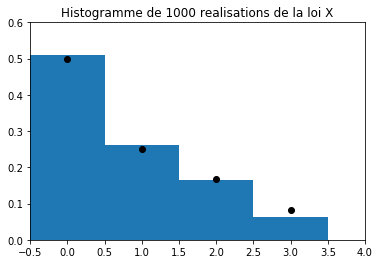

In [10]:
# Question 10 

#Fonction qui renvoie un histogramme de 1000 simulations de X 

def hist_x(X):
    plt.hist([X() for k in range(1000)], bins=4, range=(-0.5,3.5), density=True)
    plt.plot([0,1,2,3], [1./2, 1./4, 1./6, 1./12], 'ko')
    plt.axis([-0.5,4,0,0.6])
    plt.title("Histogramme de 1000 realisations de la loi X")
    plt.show()
    
hist_x(X)  

In [11]:
# Question 11
##### Question 11 #####
#Fonction qui renvoie P(Z=k) = p_k   et p_k sera un vecteur (p_0,...,p_{N-1}) (p_N est calculee) en entrée de la fonction
#Ce vecteur doit etre positif, et la somme de ses coefficients inferieure a 1.
def Z(pk):
    if  sum(pk)>1 or min(pk)<0 :
        print("pk n'est pas une probabilite")
        return
    x = unif1(0,1)
    somme = 0
    for i in range(len(pk)):
        somme += pk[i]
        if x<somme:
            return i
    return len(pk)

pk = [1./2, 1./4, 1./6] # Ont reprend X de la question précédente
#test
for i in range(10):
    print("une simulation de la variable X :", Z(pk))
     

une simulation de la variable X : 0
une simulation de la variable X : 1
une simulation de la variable X : 1
une simulation de la variable X : 0
une simulation de la variable X : 3
une simulation de la variable X : 0
une simulation de la variable X : 0
une simulation de la variable X : 1
une simulation de la variable X : 0
une simulation de la variable X : 0
